# A. UML

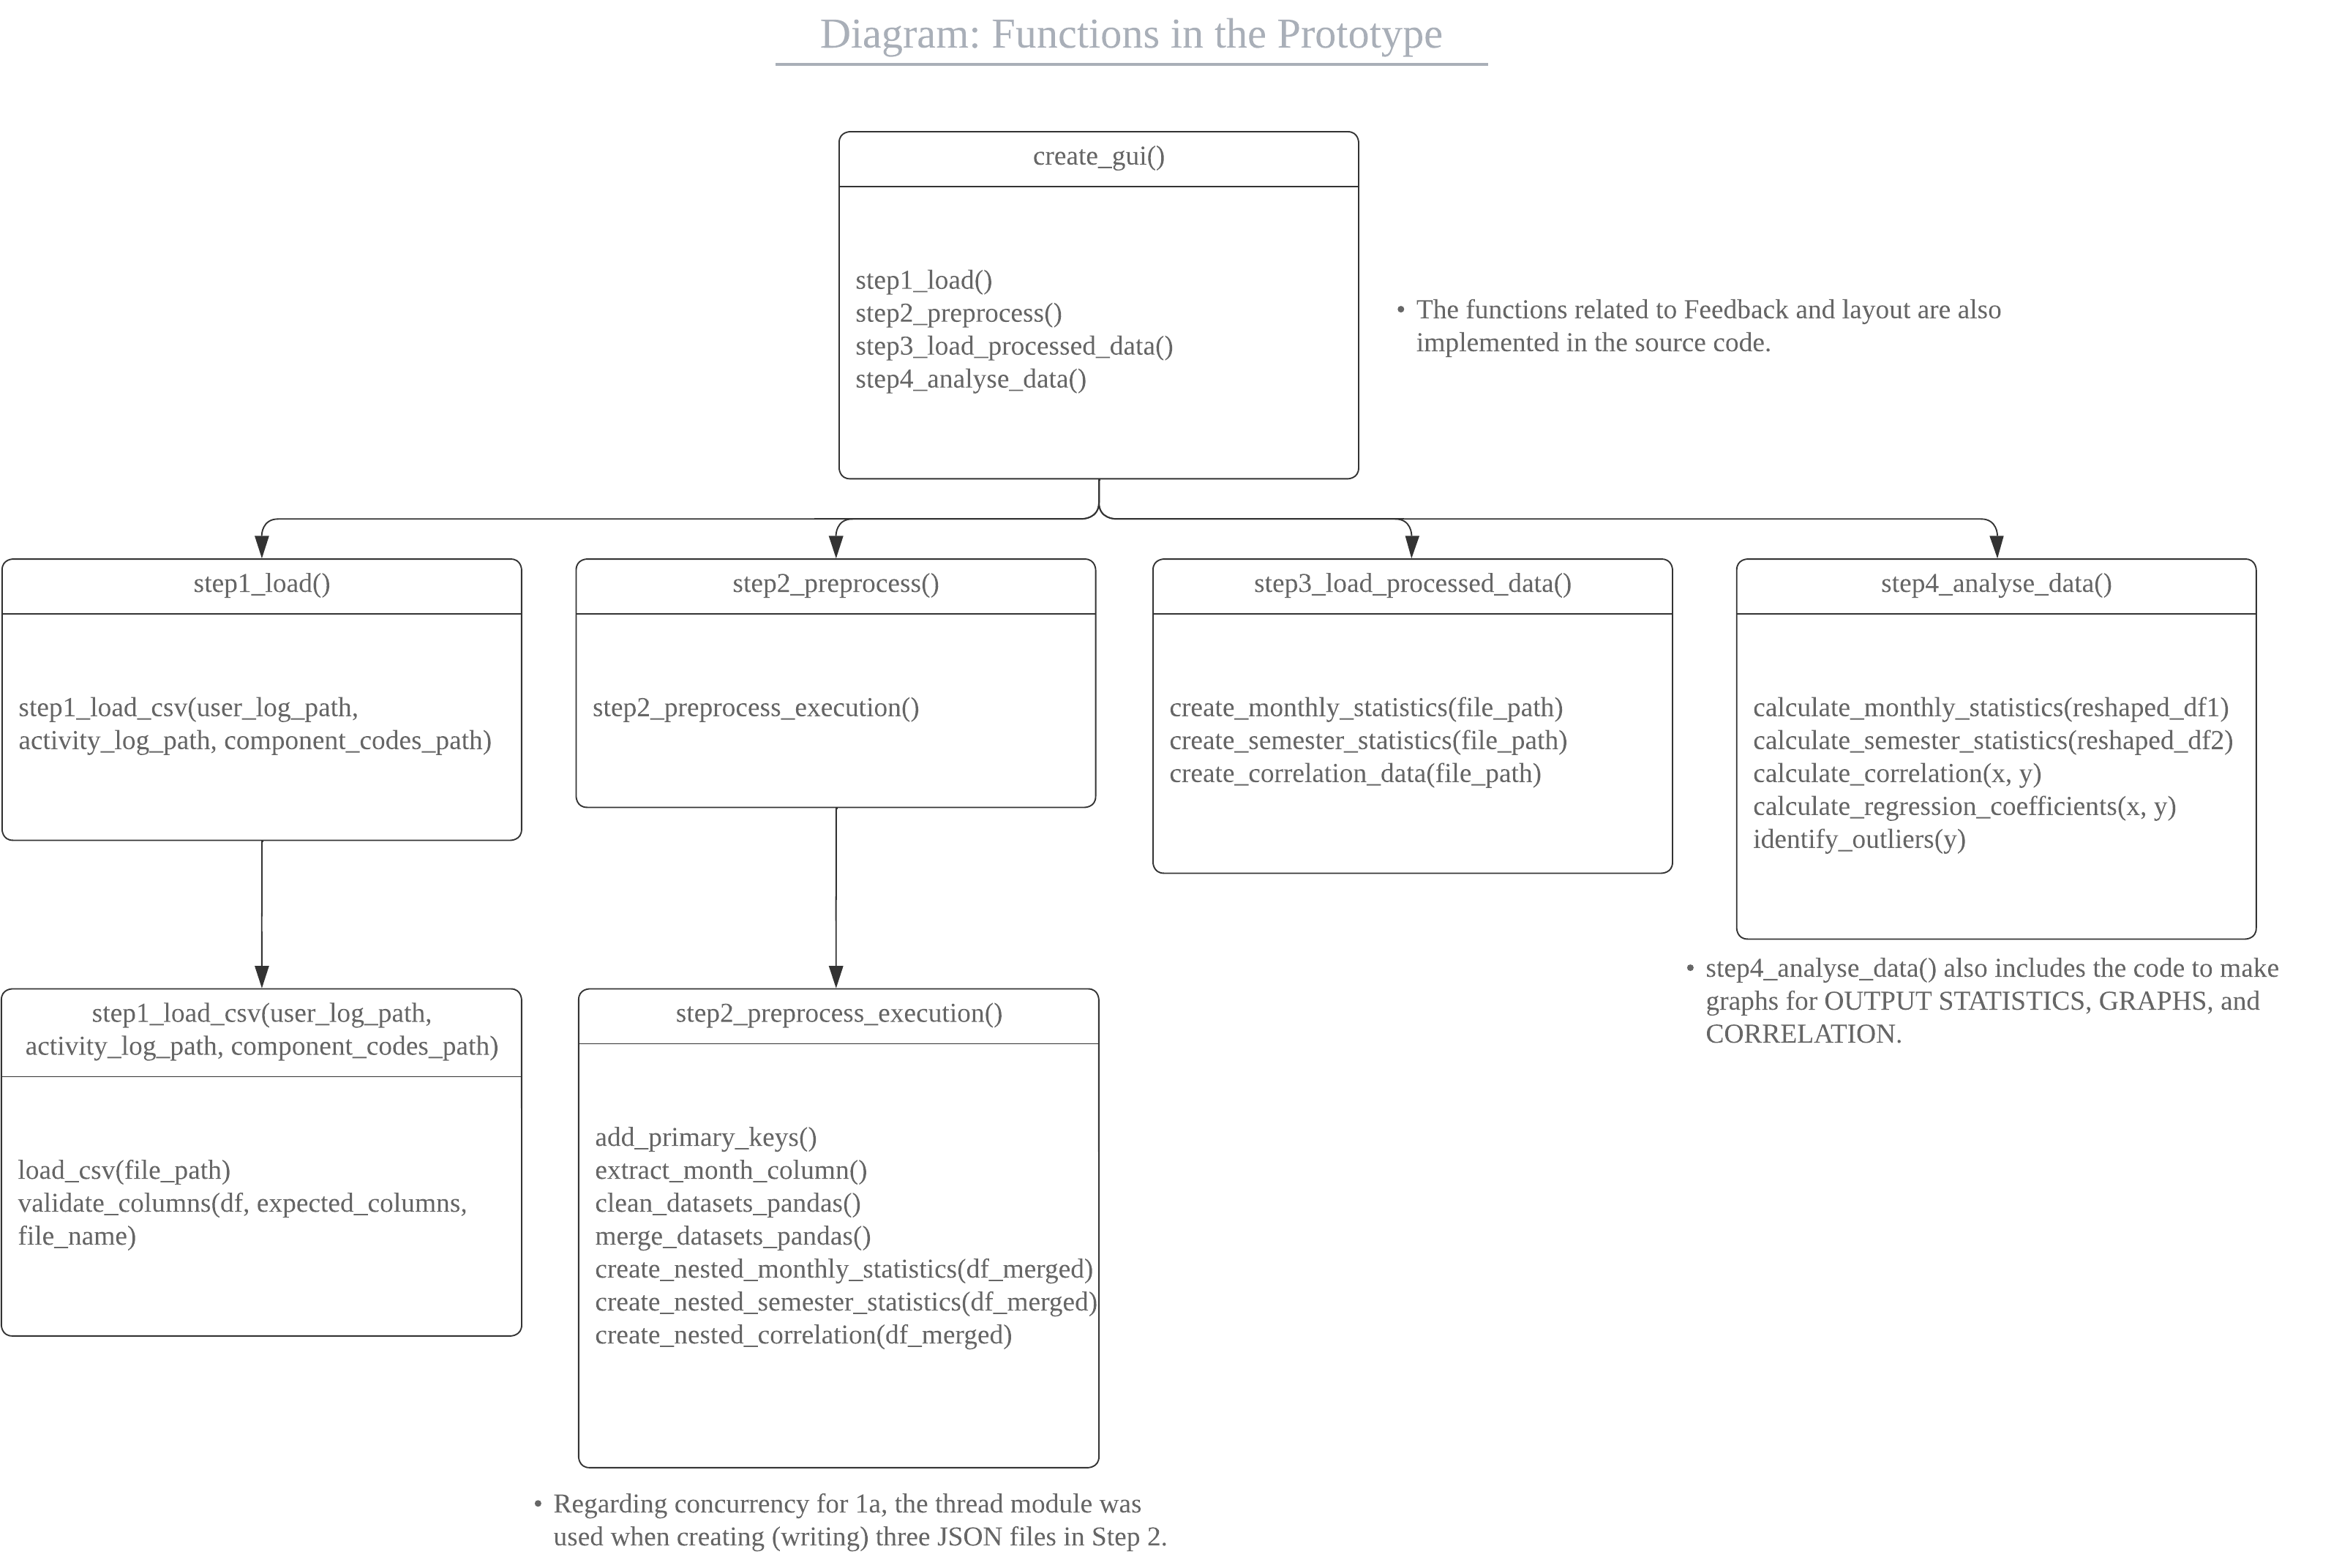

# B. Source Code

## API

In [1]:
# Check Version
import sys

# Load CSV Files and Preprocess Data 
# Used for (LOAD), (RENAME), (REMOVE), (MERGE), (RESHAPE), (COUNT), (OUTPUT STATISTICS), (GRAPHS) and (CORRELATION)
import pandas as pd 

# Make Data Format 
# Used for (RESHAPE), (COUNT)
import json

# Calculate Correlation Coefficient 
# Used for (CORRELATION)
import numpy as np

# Display Graphs 
# Used for (OUTPUT STATISTICS), (GRAPHS) and (CORRELATION)
import matplotlib.pyplot as plt

# Make GUI
import tkinter as tk
from tkinter import messagebox, ttk, filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
# Check version
print(sys.version)

3.8.2 (default, Mar 25 2020, 11:22:43) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


## Step 1: Load Initial Datasets
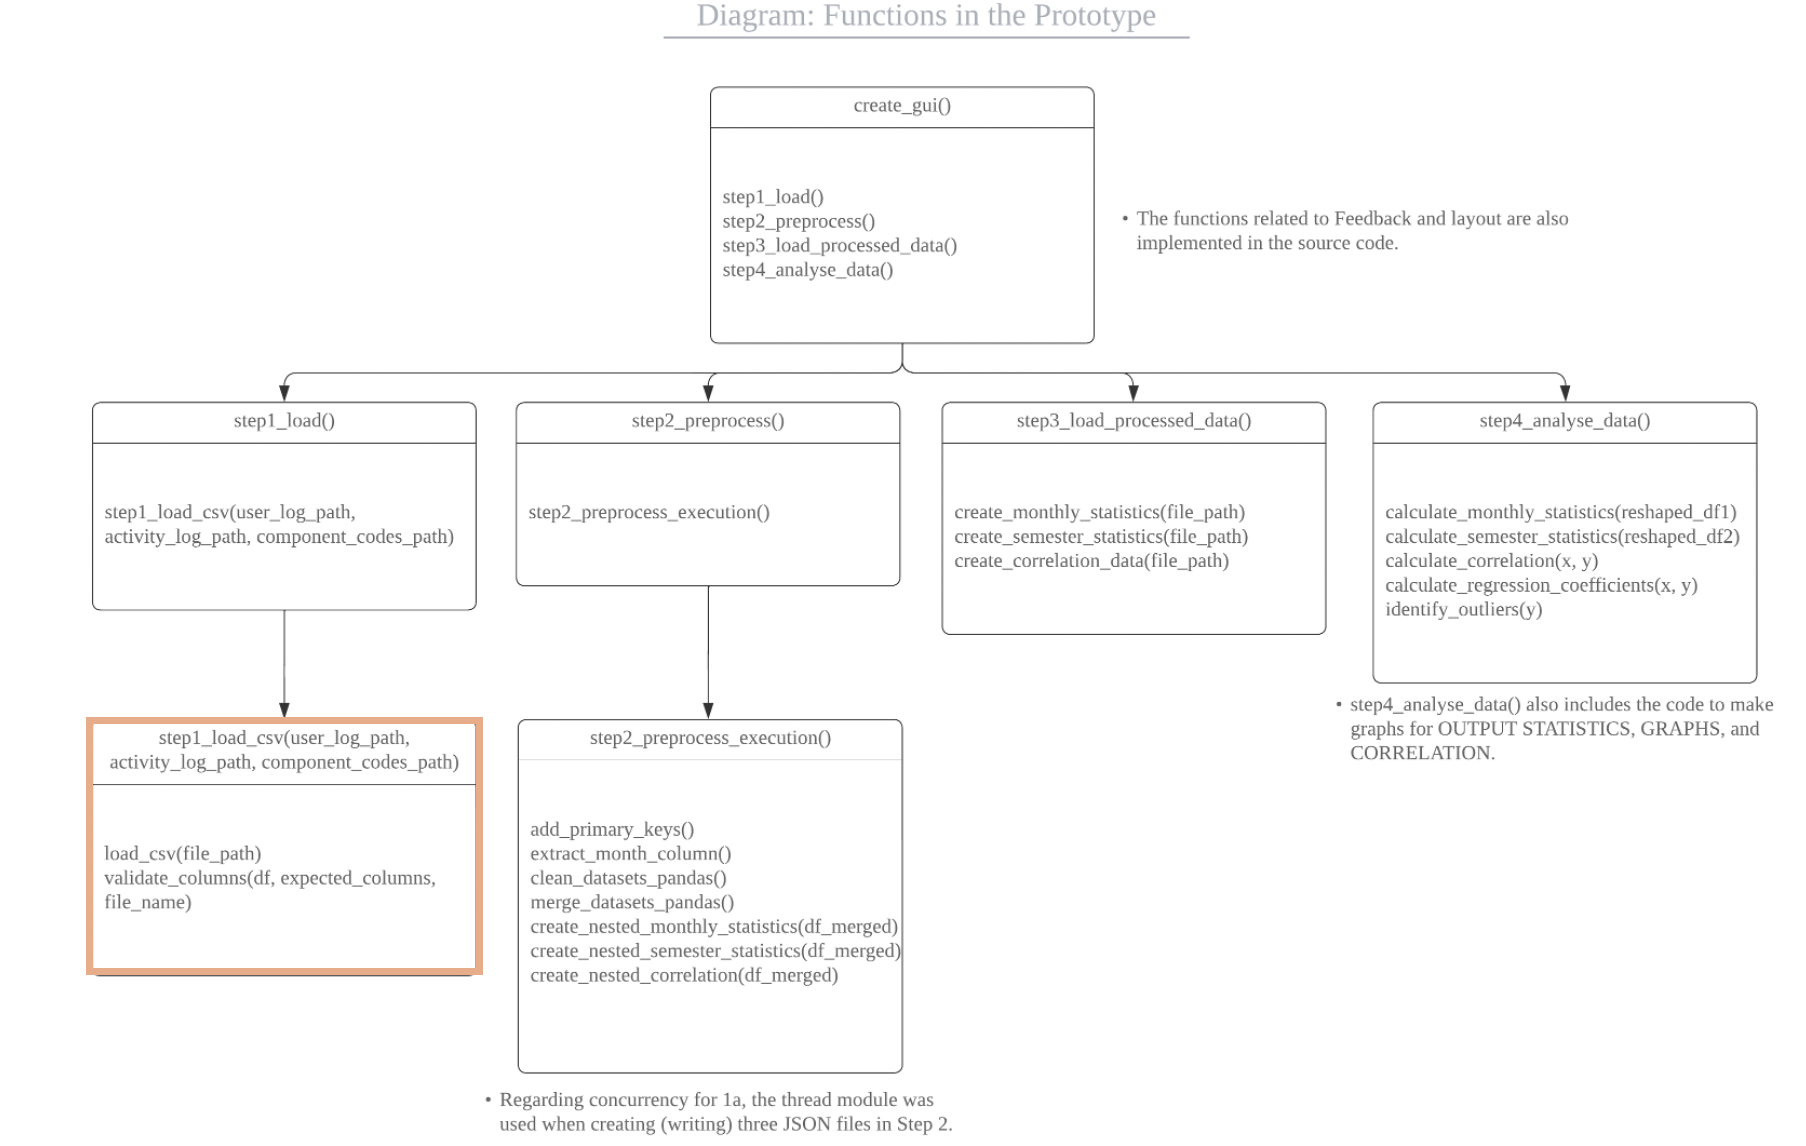

In [4]:
# Step 1-2
def validate_columns(df, expected_columns, file_name):
    """
    Purpose: 
    - Validate each CSV file has expected columns. 
    
    The function will be called in:
    - def step1_load_csv()
    """
    missing_columns = expected_columns - set(df.columns)
    if missing_columns:
        raise ValueError(f"Missing columns {missing_columns} in {file_name}")

In [5]:
# Step 1-3
def step1_load_csv(user_path, activity_path, component_path):
    """
    Purpose: 
    - Execute 'load_csv' and 'validate_columns'. 
    
    The function will be called in:
    - def step1_load() in create_gui().
    """
    try:
        # Define the expected columns for each dataset
        expected_columns_user_log = {"Date", "Time", "User Full Name *Anonymized"}
        expected_columns_activity_log = {"User Full Name *Anonymized", "Component", "Action", "Target"}
        expected_columns_component_codes = {"Component", "Code"}

        # Load datasets
        df_user = load_csv(user_path)
        df_activity = load_csv(activity_path)
        df_component = load_csv(component_path)

        # Validate columns
        validate_columns(df_user, expected_columns_user_log, "USER_LOG")
        validate_columns(df_activity, expected_columns_activity_log, "ACTIVITY_LOG")
        validate_columns(df_component, expected_columns_component_codes, "COMPONENT_CODES")

        # Rename "User Full Name" to "User_ID" for consistency
        df_user.rename(columns={"User Full Name *Anonymized": "User_ID"}, inplace=True)
        df_activity.rename(columns={"User Full Name *Anonymized": "User_ID"}, inplace=True)

        print("Step 1: All datasets loaded and validated successfully (RENAME).")
        return df_user, df_activity, df_component

    except Exception as e:
        print(f"Error in Step 1: {str(e)}")
        return None, None, None

In [6]:
# Test

"""
user_path = 'Data/USER_LOG.csv'
activity_path = 'Data/ACTIVITY_LOG.csv'
component_path = 'Data/COMPONENT_CODES.csv'
df_user, df_activity, df_component = step1_load_csv(user_path, activity_path, component_path)
"""

Step 1-1: File loaded successfully: Data/USER_LOG.csv
Step 1-1: File loaded successfully: Data/ACTIVITY_LOG.csv
Step 1-1: File loaded successfully: Data/COMPONENT_CODES.csv
Step 1: All datasets loaded and validated successfully (RENAME).


## Step 2: Preprocess
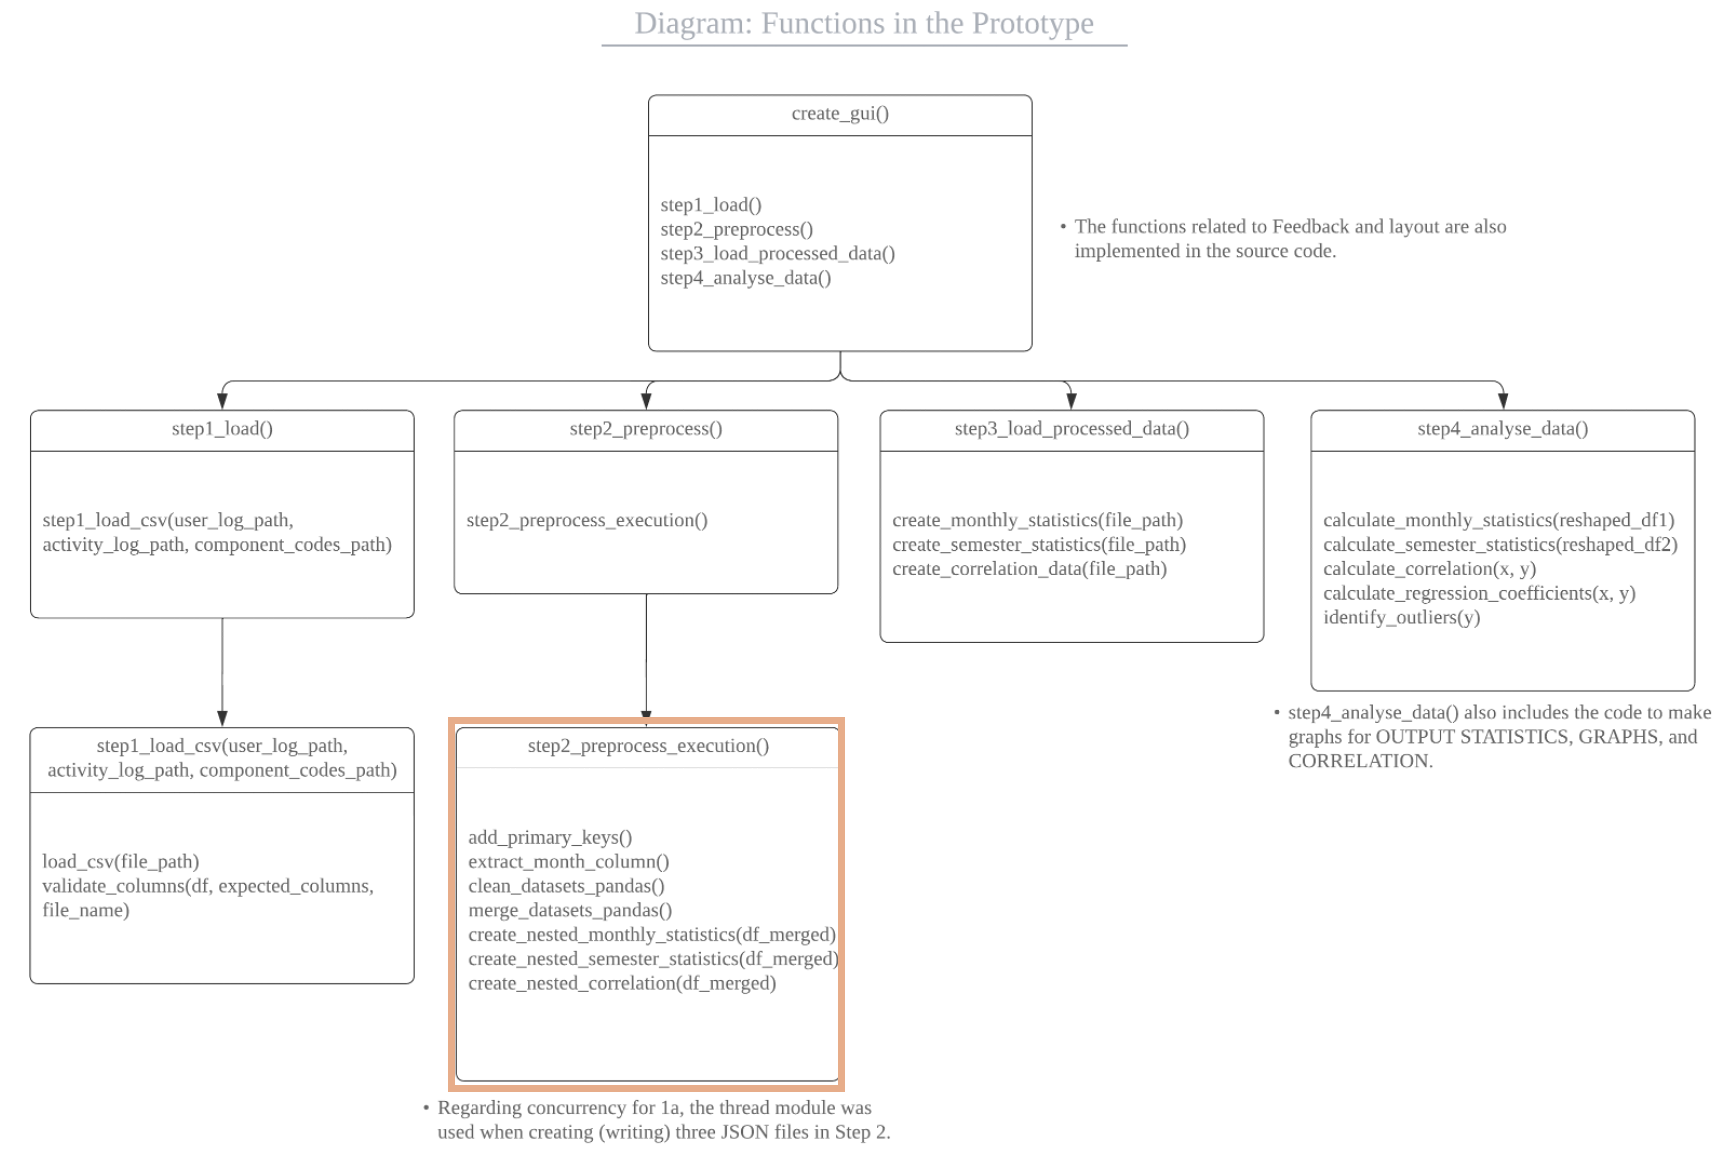

In [6]:
# Step 2-1
def add_primary_keys():
    """
    Purpose: 
    - Add the a primary key to merge each file.

    The function will be called in:
    - def step2_preprocess_execution().
    """
    global df_user, df_activity
    df_user['PK'] = range(1, len(df_user) + 1)
    df_activity['PK'] = range(1, len(df_activity) + 1)
    print("Step 2-1: Primary keys added successfully.")

In [8]:
# Test

"""
add_primary_keys()
"""

Step 2-1: Primary keys added successfully.


In [9]:
# Debugging

"""
print("df_user (after PK assignment):")
print(df_user.head())
print(df_user.shape)

print("df_activity (after PK assignment):")
print(df_activity.head())
print(df_activity.shape)
"""

df_user (after PK assignment):
               Date       Time  User_ID  PK
0  17/11/2023 00:00   00:00:00      129   1
1  10/11/2023 00:00   00:00:01       26   2
2  10/11/2023 00:00   00:00:02       26   3
3  20/12/2023 00:00   00:00:02       86   4
4  20/12/2023 00:00   00:00:03       86   5
(150835, 4)
df_activity (after PK assignment):
   User_ID   Component   Action            Target  PK
0      129      Course   Viewed           Content   1
1       26        Quiz  Updated          Response   2
2       26        Quiz   Viewed           Attempt   3
3       86  Assignment   Viewed        Assignment   4
4       86  Assignment   Viewed  Submission_state   5
(150835, 5)


In [7]:
# Step 2-2
def extract_month_column():
    """
    Purpose: 
    - Extract month column in Pandas.

    The function will be called in:
    - def step2_preprocess_execution().
    """
    global df_user
    try:
        df_user['Activity_DateTime'] = pd.to_datetime(
            df_user['Date'] + ' ' + df_user['Time'], 
            errors='coerce', 
            dayfirst=True  # dd/mm/yyyy 
        )
        
        invalid_rows = df_user[df_user['Activity_DateTime'].isna()]
        if not invalid_rows.empty:
            print("Dropping invalid rows:", invalid_rows)
            df_user = df_user.dropna(subset=['Activity_DateTime'])

        df_user['Month'] = df_user['Activity_DateTime'].dt.strftime('%B')
        print("Step 2-2: Month column extracted successfully.")
    except Exception as e:
        print(f"Error in Step 2-2: {str(e)}")

In [11]:
# Test

"""
extract_month_column()
"""

Step 2-2: Month column extracted successfully.


In [13]:
# Debugging

"""
print("df_user (after Month extraction):")
print(df_user[['Date', 'Time', 'Activity_DateTime', 'Month']].head(20))

# Check for missing or invalid rows
invalid_rows = df_user[df_user['Activity_DateTime'].isna()]
if not invalid_rows.empty:
    print("Invalid rows:")
    print(invalid_rows)
"""

df_user (after Month extraction):
                Date       Time   Activity_DateTime     Month
0   17/11/2023 00:00   00:00:00 2023-11-17 00:00:00  November
1   10/11/2023 00:00   00:00:01 2023-11-10 00:00:01  November
2   10/11/2023 00:00   00:00:02 2023-11-10 00:00:02  November
3   20/12/2023 00:00   00:00:02 2023-12-20 00:00:02  December
4   20/12/2023 00:00   00:00:03 2023-12-20 00:00:03  December
5   20/12/2023 00:00   00:00:03 2023-12-20 00:00:03  December
6   20/12/2023 00:00   00:00:06 2023-12-20 00:00:06  December
7   23/10/2023 00:00   00:00:08 2023-10-23 00:00:08   October
8   23/10/2023 00:00   00:00:08 2023-10-23 00:00:08   October
9   23/10/2023 00:00   00:00:10 2023-10-23 00:00:10   October
10  23/10/2023 00:00   00:00:10 2023-10-23 00:00:10   October
11  23/10/2023 00:00   00:00:10 2023-10-23 00:00:10   October
12  23/10/2023 00:00   00:00:10 2023-10-23 00:00:10   October
13  23/10/2023 00:00   00:00:10 2023-10-23 00:00:10   October
14  23/10/2023 00:00   00:00:11 2023

In [8]:
# Step 2-3
def clean_datasets_pandas():
    """
    Purpose: 
    - Remove the rows including 'System' or 'Folder'(REMOVE).

    The function will be called in:
    - def step2_preprocess_execution().
    """
    global df_activity
    try:
        # Remove rows where Component is 'System' or 'Folder'
        df_activity = df_activity[~df_activity['Component'].isin(['System', 'Folder'])]
        print("Step 2-3: Data cleaned successfully in Pandas(REMOVE).")
    except Exception as e:
        print(f"Error in Step 2-3: {str(e)}")

In [11]:
# Test
"""
clean_datasets_pandas()
"""

In [9]:
# Step 2-4
def merge_datasets_pandas():
    """
    Purpose: 
    - Merge datasets in Pandas (MERGE).

    The function will be called in:
    - def step2_preprocess_execution().
    """
    global df_merged
    try:
        df_merged = pd.merge(
            df_activity,
            df_user[['PK', 'Month']],
            on='PK',
            how='left'
        )
        df_merged = pd.merge(
            df_merged,
            df_component,
            on='Component',
            how='left'
        )
        print("Step 2-4: Datasets merged successfully in Pandas(MERGE).")
    except Exception as e:
        print(f"Error in Step 2-4: {str(e)}")

In [14]:
# Test
"""
merge_datasets_pandas()
"""

In [18]:
# Debugging

"""

print("df_activity (before merge):")
print(df_activity.head(10))

print("df_user (before merge):")
print(df_user[['PK', 'Month']].head(10))

print("df_component (before merge):")
print(df_component.head(10))

print("df_merged (after merge):")
print(df_merged.head(10))

"""

df_activity (before merge):
    User_ID   Component     Action             Target  PK
0       129      Course     Viewed            Content   1
1        26        Quiz    Updated           Response   2
2        26        Quiz     Viewed            Attempt   3
3        86  Assignment     Viewed         Assignment   4
4        86  Assignment     Viewed   Submission_state   5
5        86  Assignment     Viewed           Feedback   6
7        94  Assignment     Viewed  Submission_status   8
8        94  Assignment     Viewed         Assignment   9
9       147  Assignment     Viewed         Assignment  10
10      147  Assignment  Submitted         Submission  11
df_user (before merge):
   PK     Month
0   1  November
1   2  November
2   3  November
3   4  December
4   5  December
5   6  December
6   7  December
7   8   October
8   9   October
9  10   October
df_component (before merge):
        Component       Code
0          Course       Cour
1            Quiz       Quiz
2      Assignment 

In [10]:
# Step 2-5
"""
Purpose: 
 - Reshape data for statistics (RESHAPE) (COUNT)
 - Save to nested JSON
These functions will be called in 
 - 'step2_preprocess_execution()'
"""

# Function 1: Create nested_monthly_statistics.json
def create_nested_monthly_statistics(df_merged, output_path="nested_monthly_statistics.json"):
    try:
        selected_components = ['Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']
        pivot_df = df_merged.pivot_table(
            index=['User_ID', 'Month'], 
            columns='Component', 
            values='Action', 
            aggfunc='count', 
            fill_value=0
        ).reset_index()

        nested_monthly_statistics = {}
        for _, row in pivot_df.iterrows():
            user_id = int(row['User_ID'])
            month = row['Month']
            if user_id not in nested_monthly_statistics:
                nested_monthly_statistics[user_id] = {"Months": {}}
            nested_monthly_statistics[user_id]["Months"][month] = {
                comp: row.get(comp, 0) for comp in selected_components
            }

        with open(output_path, "w") as f:
            json.dump(nested_monthly_statistics, f, indent=4)

        print(f"Step 2-5: Created {output_path} for OUTPUT STATISTICS" )
    except Exception as e:
        raise ValueError(f"Error creating {output_path}: {str(e)}")

# Function 2: Create nested_semester_statistics.json
def create_nested_semester_statistics(df_merged, output_path="nested_semester_statistics.json"):
    try:
        selected_components = ['Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']
        pivot_df = df_merged.pivot_table(
            index=['User_ID', 'Month'], 
            columns='Component', 
            values='Action', 
            aggfunc='count', 
            fill_value=0
        ).reset_index()

        semester_stats = pivot_df.groupby(['User_ID']).sum(numeric_only=True).reset_index()
        nested_semester_statistics = {
            int(row['User_ID']): {comp: int(row.get(comp, 0)) for comp in selected_components}
            for _, row in semester_stats.iterrows()
        }

        with open(output_path, "w") as f:
            json.dump(nested_semester_statistics, f, indent=4)

        print(f"Step 2-5: Created {output_path} for OUTPUT STATISTICS")
    except Exception as e:
        raise ValueError(f"Error creating {output_path}: {str(e)}")

# Function 3: Create nested_correlation.json
def create_nested_correlation(df_merged, output_path="nested_correlation.json"):
    try:
        pivot_df = df_merged.pivot_table(
            index=['User_ID', 'Month'], 
            columns='Component', 
            values='Action', 
            aggfunc='count', 
            fill_value=0
        ).reset_index()

        semester_stats = pivot_df.groupby(['User_ID']).sum(numeric_only=True).reset_index()
        correlation_columns = ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']
        available_correlation_columns = [col for col in correlation_columns if col in semester_stats.columns]

        correlation_data = semester_stats[['User_ID'] + available_correlation_columns]
        nested_correlation_data = {
            int(row['User_ID']): row.drop('User_ID').to_dict()
            for _, row in correlation_data.iterrows()
        }

        with open(output_path, "w") as f:
            json.dump(nested_correlation_data, f, indent=4)

        print(f"Step 2-5: Created {output_path} for GRAPH and CORRELATION")
    except Exception as e:
        raise ValueError(f"Error creating {output_path}: {str(e)}")

In [20]:
# Test

"""

create_nested_monthly_statistics(df_merged)
create_nested_semester_statistics(df_merged)
create_nested_correlation(df_merged)

"""

Step 2-5: Created nested_monthly_statistics.json for OUTPUT STATISTICS
Step 2-5: Created nested_semester_statistics.json for OUTPUT STATISTICS
Step 2-5: Created nested_correlation.json for GRAPH and CORRELATION


In [11]:
# Step 2 (for conducting the tasks from step 2-1 to 2-6)
def step2_preprocess_execution():
    """
    Purpose: 
    - Call the defined functions  (Step 2-1 to 2-5)

    The function will be called in:
    - def create_gui().
    """
    try:
        # Step 2-1 to 2-4: Preprocess using Pandas
        add_primary_keys()          # Add primary keys to the datasets
        extract_month_column()      # Extract month column from user logs
        clean_datasets_pandas()     # Remove unwanted rows and clean the data
        merge_datasets_pandas()     # Merge datasets

        # Step 2-5: Reshape data for statistics and save to JSON
        create_nested_monthly_statistics(df_merged)     # First Data Chunk for Monthly Statistics 
        create_nested_semester_statistics(df_merged)    # Second Data Chunk for Semester Statistics
        create_nested_correlation(df_merged)            # Third Data Chunk for Correlation

        print("Step 2 Complete: Preprocessing, merging, and JSON saving completed successfully.")
    except Exception as e:
        print(f"Error in Step 2: {str(e)}")

## Step 3: Load the Processed Data
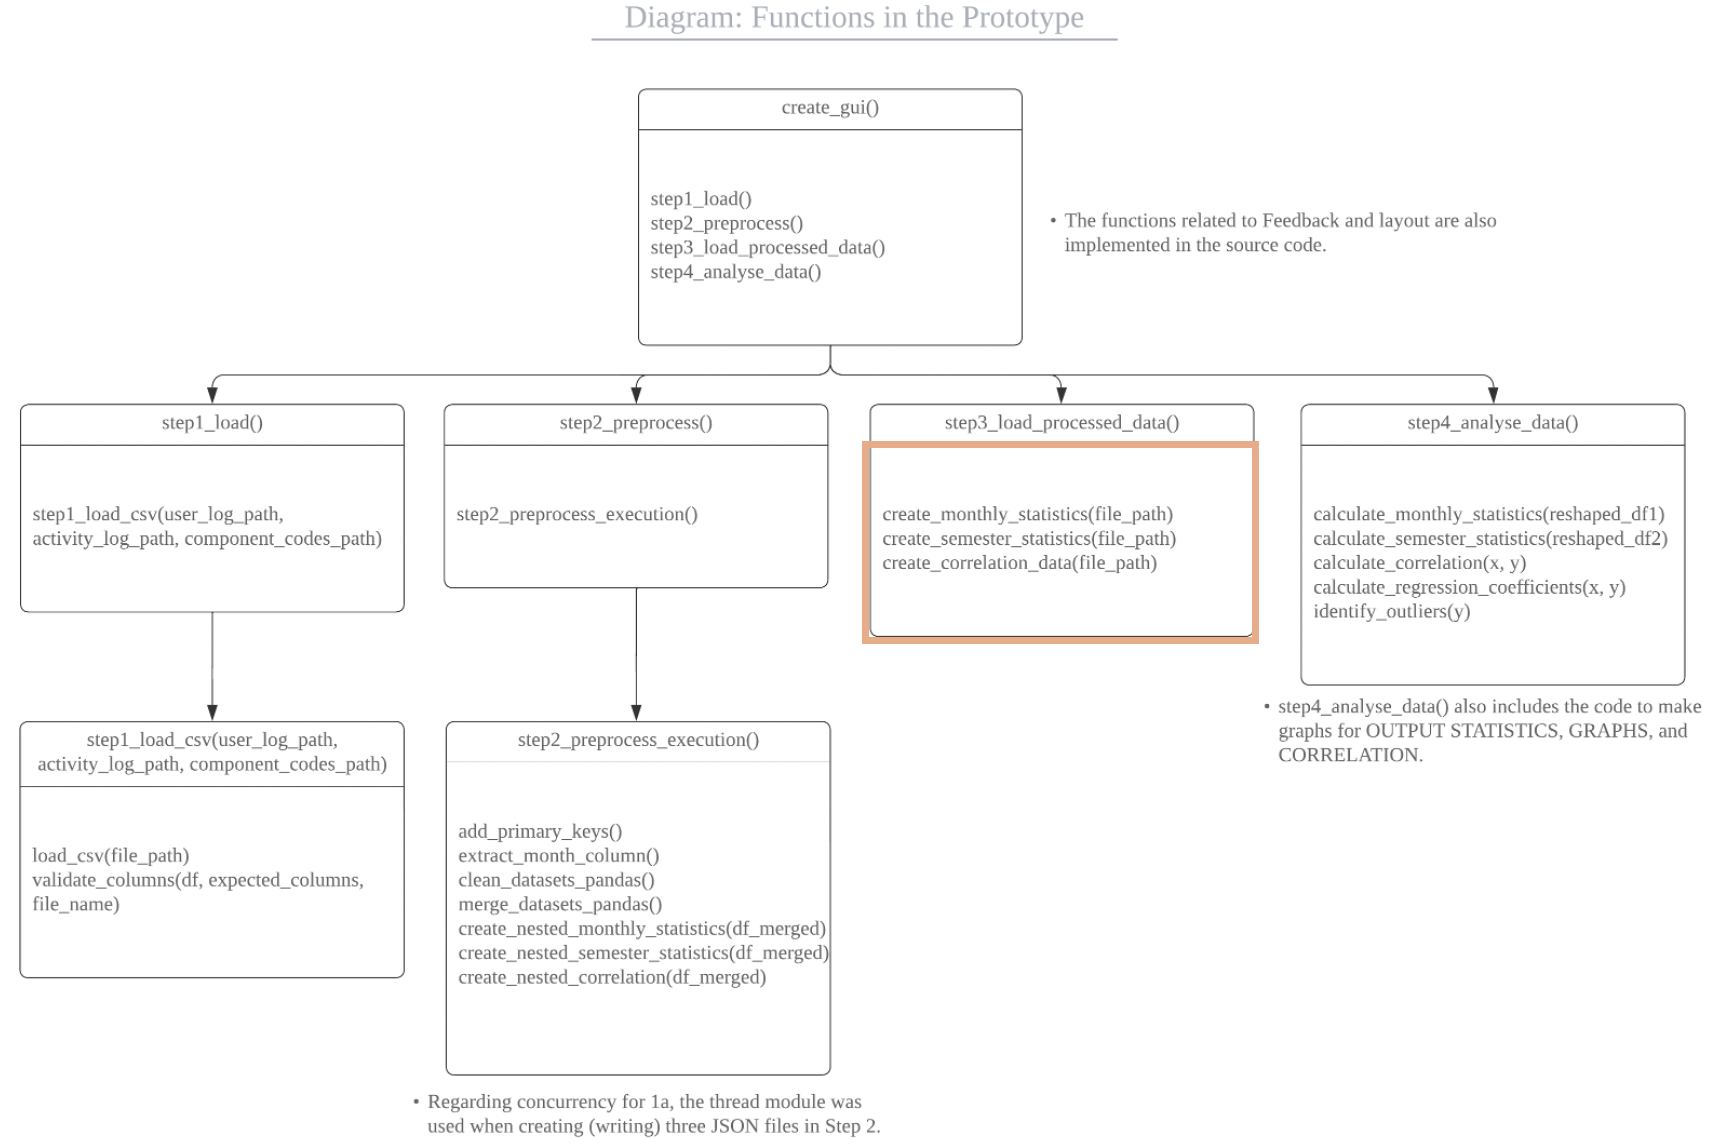

In [12]:
# Step 3
"""
Purpose: Load three JSON files and save them as DataFrames.
The functions will be called in 'create_csv()'.
"""

# 1. Monthly Statistics: Include Month and specified Components as columns
def create_monthly_statistics(file_path):
    try:
        with open(file_path, "r") as f:
            nested_monthly_statistics = json.load(f)
        
        records = []
        for user_id, user_data in nested_monthly_statistics.items():
            for month, components in user_data["Months"].items():
                record = {"User_ID": user_id, "Month": month}
                record.update({comp: components.get(comp, 0) for comp in ['Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']})
                records.append(record)
        
        monthly_stats_df = pd.DataFrame(records)
        print(f"Step 3: Monthly statistics (with Month) DataFrame created with {len(monthly_stats_df)} rows.")
        return monthly_stats_df
    except Exception as e:
        print(f"Error creating monthly statistics DataFrame: {str(e)}")
        return None

# 2. Semester Statistics: Without Month, only specified Components as columns
def create_semester_statistics(file_path):
    try:
        with open(file_path, "r") as f:
            nested_semester_statistics = json.load(f)
        
        records = []
        for user_id, components in nested_semester_statistics.items():
            record = {"User_ID": user_id}
            record.update({comp: components.get(comp, 0) for comp in ['Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']})
            records.append(record)
        
        semester_stats_df = pd.DataFrame(records)
        print(f"Step 3: Semester statistics DataFrame created with {len(semester_stats_df)} rows.")
        return semester_stats_df
    except Exception as e:
        print(f"Error creating semester statistics DataFrame: {str(e)}")
        return None

# 3. Correlation Data: Include only specified Components as columns
def create_correlation_data(file_path):
    try:
        with open(file_path, "r") as f:
            nested_correlation = json.load(f)
        
        records = []
        for user_id, components in nested_correlation.items():
            record = {"User_ID": user_id}
            record.update({comp: components.get(comp, 0) for comp in ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']})
            records.append(record)
        
        correlation_df = pd.DataFrame(records)
        print(f"Step 3: Correlation Data DataFrame created with {len(correlation_df)} rows.")
        return correlation_df
    except Exception as e:
        print(f"Error creating correlation data DataFrame: {str(e)}")
        return None

In [22]:
# Test

"""

create_monthly_statistics("nested_monthly_statistics.json")
create_semester_statistics("nested_semester_statistics.json")
create_correlation_data("nested_correlation.json")

"""

Step 3: Monthly statistics (with Month) DataFrame created with 566 rows.
Step 3: Semester statistics DataFrame created with 152 rows.
Step 3: Correlation Data DataFrame created with 152 rows.


,User_ID,Assignment,Quiz,Lecture,Book,Project,Course
0,1,135,210,40,1,0,62
1,2,247,148,37,2,0,66
2,3,22,125,0,0,0,19
3,4,278,129,32,3,0,67
4,5,387,200,74,4,0,220
...,...,...,...,...,...,...,...
147,150,150,54,10,2,0,39
148,151,284,136,72,7,0,118
149,152,162,27,7,3,0,47
150,153,240,79,72,3,0,76


## Step 4: Analyse and Visualise
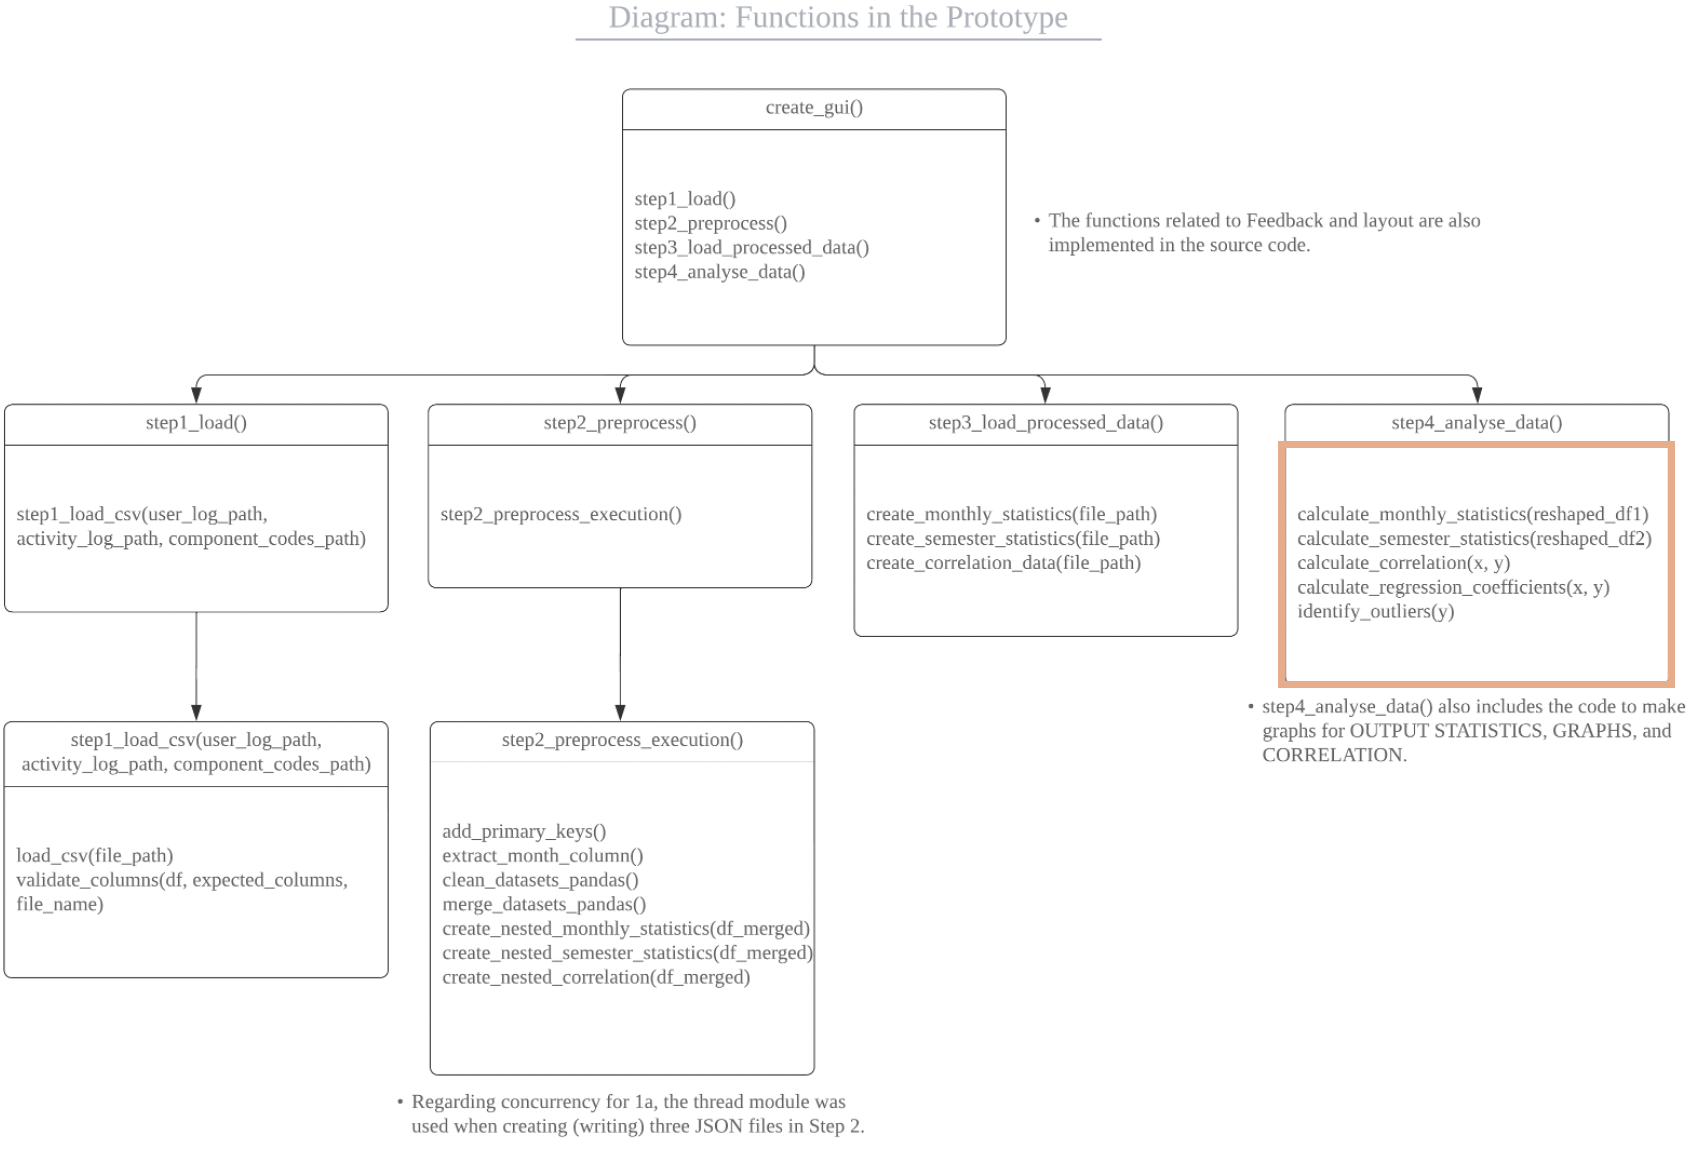

In [13]:
# Step 4-1 Analyse Monthly Statistics
def calculate_monthly_statistics(df):
    """
    Purpose:
    -  Calculate monthly statistics (Mean, Median, Mode) for each component.
    
    This function will be called in: 
    - create_gui()
    """
    try:
        components = ['Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']
        available_components = [col for col in components if col in df.columns]

        if not available_components:
            raise ValueError("No valid components found for statistics.")

        stats_list = []  # Store stats for all components

        # Iterate over each component and calculate stats
        for component in available_components:
            grouped = df.groupby('Month')[component]
            stats = grouped.agg([
                ('Mean', 'mean'),
                ('Median', 'median'),
                ('Mode', lambda x: x.mode().iloc[0] if not x.mode().empty else 0)
            ])
            stats.reset_index(inplace=True)
            stats['Component'] = component
            stats_list.append(stats)

        # Concatenate results for all components
        monthly_statistics_df = pd.concat(stats_list, ignore_index=True)

        # Clean and reorder columns
        monthly_statistics_df = monthly_statistics_df[['Component', 'Month', 'Mean', 'Median', 'Mode']]
        month_order = ['September', 'October', 'November', 'December']
        monthly_statistics_df['Month'] = pd.Categorical(monthly_statistics_df['Month'], categories=month_order, ordered=True)
        monthly_statistics_df.sort_values(by=['Month', 'Component'], inplace=True)
        
        # Modify "Attendence"
        monthly_statistics_df['Component'] = monthly_statistics_df['Component'].replace("Attendence", "Attendance")

        print("Step 4-1: Monthly statistics calculated successfully.(OUTPUT STATISTICS)")
        return monthly_statistics_df

    except Exception as e:
        print(f"Error in calculating monthly statistics: {str(e)}")
        return None

In [14]:
# Step 4-2 Analyse Semester Statistics
def calculate_semester_statistics(df):
    """
    Purpose:
    -  Calculate semester statistics (Mean, Median, Mode) for each component.
    
    This function will be called in: 
    - create_gui()
    """
    try:
        components = ['Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']
        available_components = [col for col in components if col in df.columns]

        if not available_components:
            raise ValueError("No valid components found for statistics.")

        stats = {}
        # Calculate stats for each component
        for component in available_components:
            stats[component] = {
                'Mean': round(df[component].mean(), 1),
                'Median': round(df[component].median(), 1),
                'Mode': round(df[component].mode().iloc[0], 1) if not df[component].mode().empty else 0
            }

        # Convert to DataFrame
        semester_statistics_df = pd.DataFrame(stats).T.reset_index()
        semester_statistics_df.rename(columns={'index': 'Component'}, inplace=True)
        
        # Modify "Attendence"
        semester_statistics_df['Component'] = semester_statistics_df['Component'].replace("Attendence", "Attendance")
        
        print("Step 4-2: Semester statistics calculated successfully.(OUTPUT STATISTICS)")
        return semester_statistics_df

    except Exception as e:
        print(f"Error in calculating semester statistics: {str(e)}")
        return None

In [15]:
# Step 4-3: Caluculate regression line and correlation coefficient
"""
Purpose: 
 - calculate_correlation: Calculate the Pearson correlation coefficient between two variables.
 - calculate_regression_coefficients: Perform linear regression and return coefficients.
 - identify_outliers: Identify outliers based on the threshold of standard deviations.
These functions will be called in 'create_gui()'.
"""

def calculate_correlation(x, y):
    try:
        return x.corr(y)
    except Exception as e:
        print(f"Error calculating correlation: {str(e)}")
        return None

def calculate_regression_coefficients(x, y):
    try:
        return np.polyfit(x, y, 1)  # Linear regression coefficients
    except Exception as e:
        print(f"Error calculating regression coefficients: {str(e)}")
        return None

def identify_outliers(y, threshold=3):
    try:
        mean = y.mean()
        std_dev = y.std()
        return (y > mean + threshold * std_dev) | (y < mean - threshold * std_dev)
    except Exception as e:
        print(f"Error identifying outliers: {str(e)}")
        return None

## GUI Part
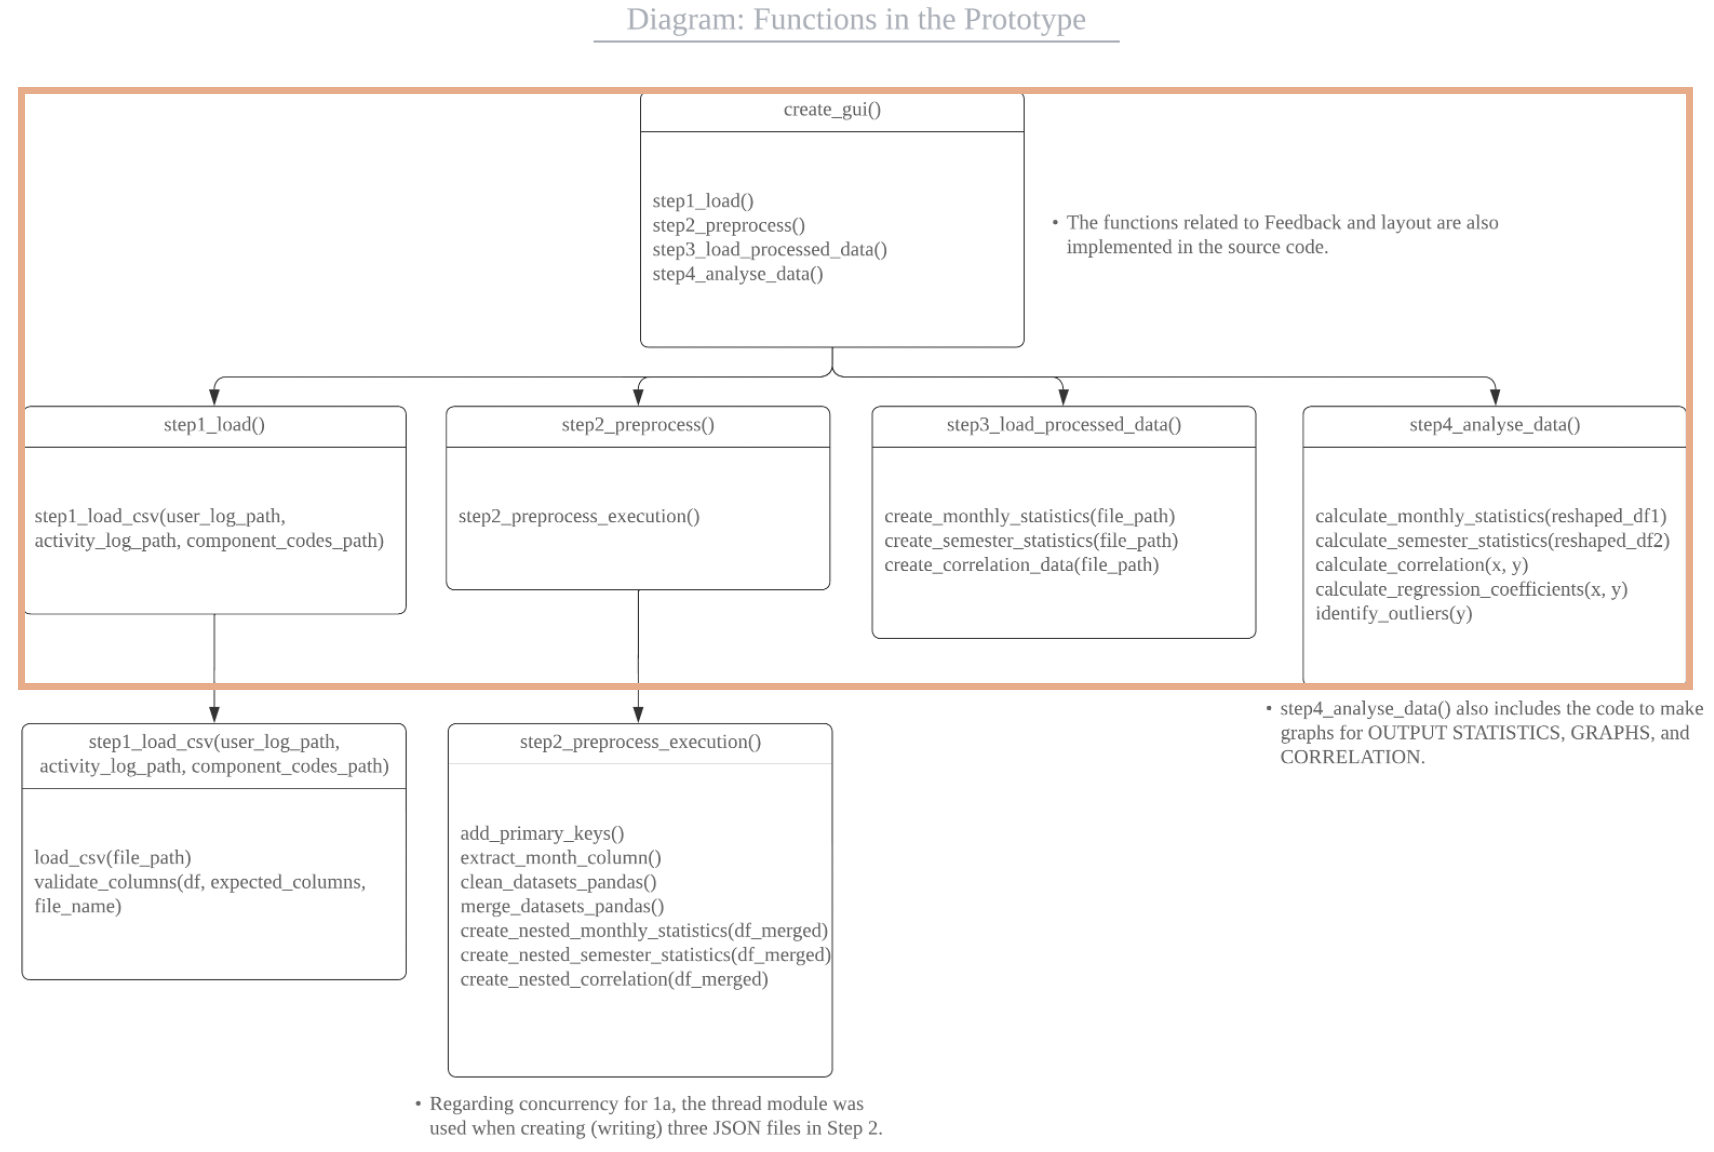

Feedback updated: Step 1: Please select the USER_LOG CSV file.
Feedback updated: Step 1: USER_LOG CSV file selected successfully. ✅ Now, select the ACTIVITY_LOG CSV file.
Feedback updated: Step 1: ACTIVITY_LOG CSV file selected successfully. ✅ Finally, select the COMPONENT_CODES CSV file.
Step 1-1: File loaded successfully: /Users/user/Library/CloudStorage/OneDrive-UniversityofYork/04_Advanced Programming 28th October 2024/02_Summative/2 Implementation/Data/USER_LOG.csv
Step 1-1: File loaded successfully: /Users/user/Library/CloudStorage/OneDrive-UniversityofYork/04_Advanced Programming 28th October 2024/02_Summative/2 Implementation/Data/ACTIVITY_LOG.csv
Step 1-1: File loaded successfully: /Users/user/Library/CloudStorage/OneDrive-UniversityofYork/04_Advanced Programming 28th October 2024/02_Summative/2 Implementation/Data/COMPONENT_CODES.csv
Step 1: All datasets loaded and validated successfully (RENAME).
Feedback updated: Step 1 Complete: All datasets loaded successfully in order! ✅

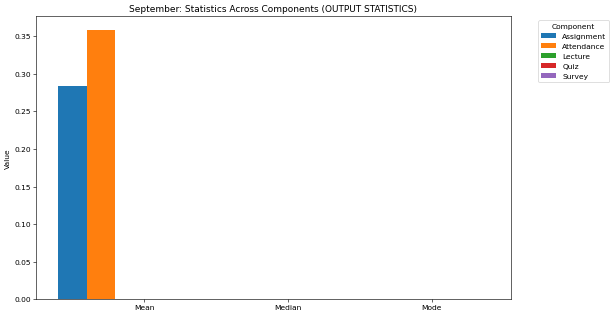

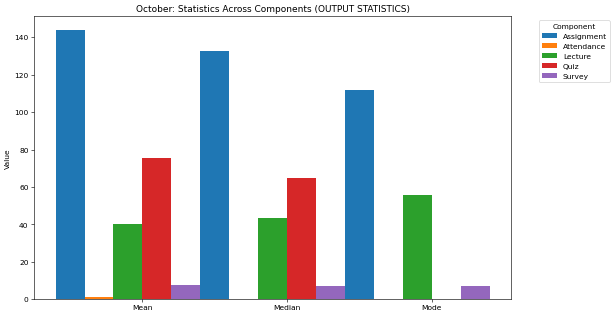

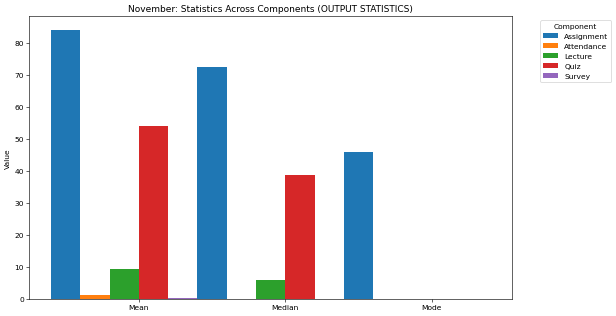

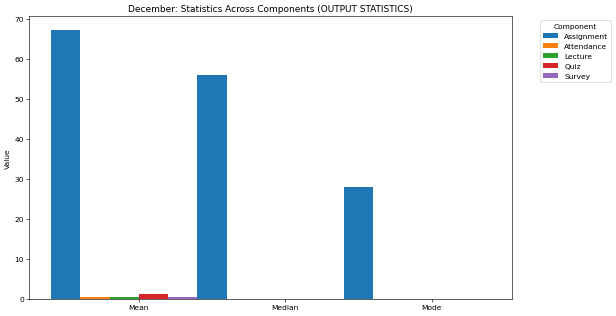

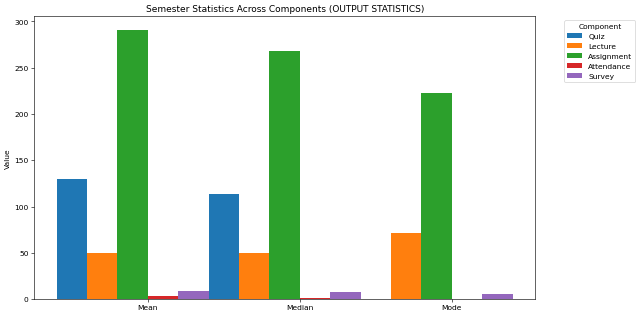

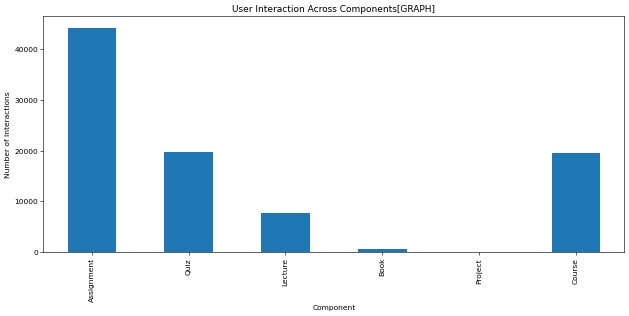

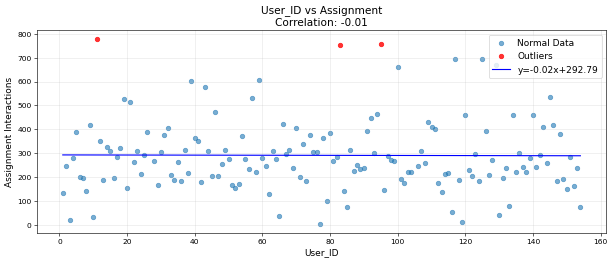

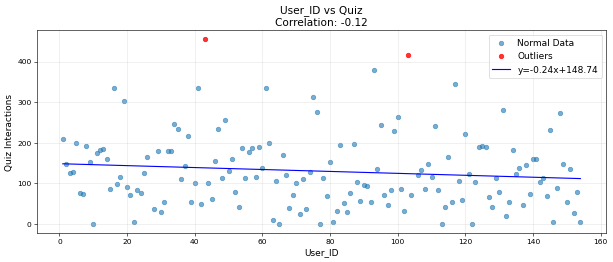

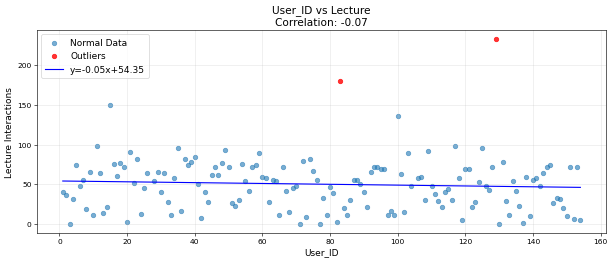

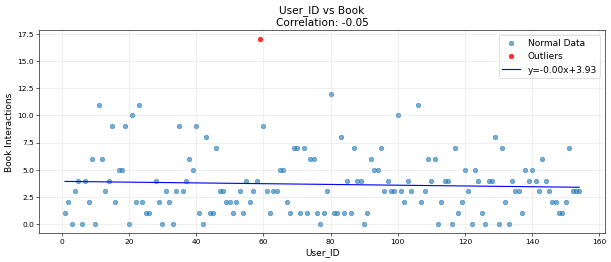

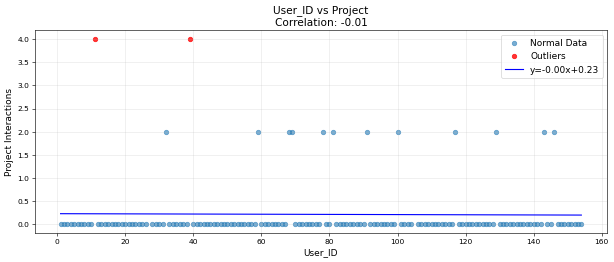

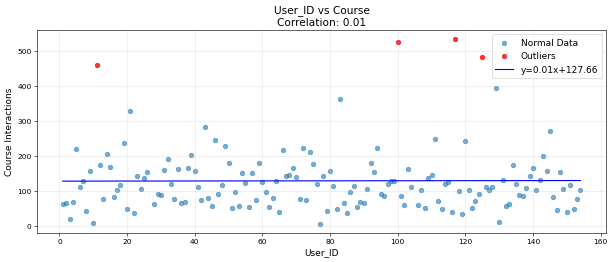

In [16]:
def create_gui():
    """
    Purpose: 
    - Make a GUI.
    
    - Conduct the following tasks on the GUI:
      Step 1. Load the three CSV files
      Step 2. Preprocessed and Merge.
      Step 3. Load the prepared JSON files.
      Step 4. Analyse and Visualise data.
    
    - Provide feedback on the notebook and the GUI.
    """

    # Create the main window
    root = tk.Tk()
    root.title("Student Engagement Analysis System")
    root.geometry("1200x1200")  # Adjusted size for better layout
    root.configure(bg="#e6f7ff")  # Set background colour

    # Add title label at the top
    title_label = tk.Label(
        root,
        text="🌟 Student Engagement Analysis System (Prototype) 🌟",
        bg="#e6f7ff",
        fg="#004d99",
        font=("Arial", 24, "bold"),
    )
    title_label.pack(pady=10)
    
    # Add a note below the title
    note_label = tk.Label(
        root,
        text="Note: The CSVs must be loaded in order (USER_LOG.csv, ACTIVITY_LOG.csv, and COMPONENT_CODES.csv)",
        bg="#e6f7ff",
        fg="#ff3333",  # Red text for emphasis
        font=("Arial", 18, "italic"),
        wraplength=800,  # Wrap text to fit in the window
        justify="center",  # Center align the text
    )
    note_label.pack(pady=5)  # Add some padding below the note

    # Left-hand side: Frame for step buttons
    button_frame = tk.LabelFrame(
        root, text="🔧 Steps", bg="#e6f7ff", font=("Arial", 16, "bold")
    )
    button_frame.place(x=20, y=120, width=300, height=600)

    # Right-hand side: Frame for output
    feedback_frame = tk.LabelFrame(
        root, text="📋 Feedback", bg="#f0f8ff", font=("Arial", 16, "bold")
    )
    feedback_frame.place(x=350, y=120, width=820, height=350)

    # Add feedback label inside the output frame for dynamic messages
    feedback_label = tk.Label(
        feedback_frame,
        text="",  # Start with an empty message
        bg="#f0f8ff",
        fg="#004d99",
        font=("Arial", 14, "italic"),
        anchor="w",  # Align text to the left
        width=100,  # Optional: Set a fixed width
        height=2,   # Optional: Set a fixed height
    )
    feedback_label.pack(fill="x", padx=5, pady=5)

    # Add a text area for displaying detailed outputs
    output_text = tk.Text(
        feedback_label, wrap="word", bg="#ffffff", fg="#003366", font=("Arial", 14)
    )
    output_text.pack(expand=True, fill="both", padx=5, pady=5)

    # Add a frame for graphs below the output frame
    graph_frame = tk.LabelFrame(
        root, text="📊 OUTPUT STATISTICS and CORRELATION", bg="#ffffff", font=("Arial", 16, "bold")
    )
    graph_frame.place(x=350, y=240, width=820, height=480)

    # Helper functions for feedback and output updates
    def update_feedback(message, success=True):
        """
        Update the feedback label with a message.
        Parameters:
        - message: The feedback text to display.
        - success: Boolean to indicate positive (green) or negative (red) feedback.
        """
        try:
            feedback_label.config(text=message, fg="green" if success else "red")
            feedback_label.update_idletasks()  # Force the UI to update
            print(f"Feedback updated: {message}")  # Debug: Print feedback to console
        except Exception as e:
            print(f"Error updating feedback: {str(e)}")  # Debug: Log any errors

    def update_output(message):
        """
        Update the output text area with the provided message.
        """
        output_text.delete(1.0, tk.END)  # Clear existing text
        output_text.insert(tk.END, message)  # Insert new message
        
    # Make scrollable graph frame on GUI
    def make_scrollable_graph_frame():
        """
        Create a scrollable frame for graphs inside a Canvas widget.
        """
        # Create a canvas and vertical scrollbar
        canvas = tk.Canvas(root, bg="#ffffff")  # Canvas for scrollable content
        scrollbar = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
        scrollable_frame = tk.Frame(canvas, bg="#ffffff")

        # Configure scrollable frame
        scrollable_frame.bind(
            "<Configure>",
            lambda e: canvas.configure(scrollregion=canvas.bbox("all"))  # Dynamically adjust scrolling
        )

        # Add the frame to the canvas
        canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
        canvas.configure(yscrollcommand=scrollbar.set)

        # Place the canvas and scrollbar in the window
        canvas.place(x=365, y=260, width=790, height=440)  # Updated placement
        scrollbar.place(x=1170, y=260, height=440)

        return scrollable_frame
    
    # Create scrollable graph frame
    graph_frame = make_scrollable_graph_frame()
    
    def plot_graph_in_gui(figs):
        """
        Embed multiple matplotlib figures into the scrollable graph frame.
        Parameters:
        - figs: List of matplotlib figures to embed.
        """
        # Clear the graph frame first
        for widget in graph_frame.winfo_children():
            widget.destroy()

        # Add each figure as a new canvas in the frame
        for i, fig in enumerate(figs):
            sub_frame = tk.Frame(graph_frame, bg="#ffffff")
            sub_frame.pack(side="top", fill="both", expand=True, pady=10)

            canvas = FigureCanvasTkAgg(fig, sub_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill="both", expand=True)
            
    # Global variables for datasets
    global df_user, df_activity, df_component
    global reshaped_df1, reshaped_df2, interaction_counts_df

    # Step 1: Load Initial Datasets
    def step1_load():
        """
        Step 1: Load initial datasets via file dialog in a specific order.
        The user is guided to select USER_LOG, ACTIVITY_LOG, and COMPONENT_CODES CSV files in order.
        """
        try:
            # Define expected filenames
            expected_files = ["USER_LOG.csv", "ACTIVITY_LOG.csv", "COMPONENT_CODES.csv"]

            # Step 1-1: Select USER_LOG
            update_feedback("Step 1: Please select the USER_LOG CSV file.")
            user_log_path = filedialog.askopenfilename(title="Select USER_LOG CSV File")

            if not user_log_path or not user_log_path.endswith(expected_files[0]):
                messagebox.showwarning(
                    "File Selection Error",
                    f"Expected {expected_files[0]}. The CSVs must be loaded in order (USER_LOG.csv, ACTIVITY_LOG.csv, and COMPONENT_CODES.csv) Please select from USER_LOG.csv."
                )
                raise ValueError(f"{expected_files[0]} is required to proceed.")

            # Step 1-2: Select ACTIVITY_LOG
            update_feedback("Step 1: USER_LOG CSV file selected successfully. ✅ Now, select the ACTIVITY_LOG CSV file.")
            activity_log_path = filedialog.askopenfilename(title="Select ACTIVITY_LOG CSV File")

            if not activity_log_path or not activity_log_path.endswith(expected_files[1]):
                messagebox.showwarning(
                    "File Selection Error",
                    f"Expected {expected_files[1]}. The CSVs must be loaded in order (USER_LOG.csv, ACTIVITY_LOG.csv, and COMPONENT_CODES.csv) Please select from USER_LOG.csv."
                )
                raise ValueError(f"{expected_files[1]} is required to proceed.")

            # Step 1-3: Select COMPONENT_CODES
            update_feedback("Step 1: ACTIVITY_LOG CSV file selected successfully. ✅ Finally, select the COMPONENT_CODES CSV file.")
            component_codes_path = filedialog.askopenfilename(title="Select COMPONENT_CODES CSV File")

            if not component_codes_path or not component_codes_path.endswith(expected_files[2]):
                messagebox.showwarning(
                    "File Selection Error",
                    f"Expected {expected_files[2]}. The CSVs must be loaded in order (USER_LOG.csv, ACTIVITY_LOG.csv, and COMPONENT_CODES.csv) Please select from USER_LOG.csv."
                )
                raise ValueError(f"{expected_files[2]} is required to proceed.")

            # Load datasets
            global df_user, df_activity, df_component
            df_user, df_activity, df_component = step1_load_csv(
                user_log_path, activity_log_path, component_codes_path
            )

            # Check if all datasets are loaded successfully
            if df_user is None or df_activity is None or df_component is None:
                raise ValueError("Failed to load one or more datasets. Please check the file format and try again.")

            update_feedback("Step 1 Complete: All datasets loaded successfully in order! ✅", success=True)
            update_output("Datasets loaded and validated. \n'RENAME' has been done.\nReady for preprocessing and merging.")
            enable_button(step2_button)
            mark_completed(step1_button)

        except ValueError as e:
            update_feedback(f"Warning: {str(e)}", success=False)
        except Exception as e:
            update_feedback(f"Error in Step 1: {str(e)}", success=False)

    # Step 2: Preprocess
    def step2_preprocess():
        """
        Step 2: Preprocess and merge datasets.
        """
        try:
            update_feedback("Preprocessing and merging datasets... Please wait.")

            # Call the Step 2 function to preprocess and merge
            step2_preprocess_execution()

            # Provide feedback to the user
            update_feedback("Step 2 Complete: Datasets preprocessed and merged successfully! ✅", success=True)
            update_output("Preprocessing and merging completed.\nData is stored in JSON.\n'REMOVE', 'MERGE', 'RESHAPE' and 'COUNT' have been done.")
            enable_button(step3_button)
            mark_completed(step2_button)

        except Exception as e:
            update_feedback(f"Error in Step 2: {str(e)}", success=False)

    # Step 3: Load the Processed Data
    def step3_load_processed_data():
        """
        Step 3: Load processed data.
        """
        try:
            update_feedback("Loading processed datasets... Please wait.")
            global reshaped_df1, reshaped_df2, interaction_counts_df

            reshaped_df1 = create_monthly_statistics("nested_monthly_statistics.json")
            reshaped_df2 = create_semester_statistics("nested_semester_statistics.json")
            interaction_counts_df = create_correlation_data("nested_correlation.json")

            update_feedback("Step 3 Complete: Processed data loaded successfully! ✅", success=True)
            update_output("Processed data loaded successfully.\nReady for analysis.")
            enable_button(step4_button)
            mark_completed(step3_button)
        except Exception as e:
            update_feedback(f"Error in Step 3: {str(e)}", success=False)
            
    # Step 4: Analyse and Visualise
    def step4_analyse_data():
        """
        Step 4: Perform statistical analysis and visualisation.
        """
        try:
            update_feedback("Conducting analysis... Please wait.")
            all_graphs = []  # Store all figures to be displayed

            # Step 4-1: Monthly Statistics (OUTPUT STATISTICS)
            monthly_statistics_df = calculate_monthly_statistics(reshaped_df1)
            months = monthly_statistics_df['Month'].unique()
            statistics = ['Mean', 'Median', 'Mode']
            bar_width = 0.2

            for month in months:
                fig, ax = plt.subplots(figsize=(10, 6))
                month_data = monthly_statistics_df[monthly_statistics_df['Month'] == month]

                x = np.arange(len(statistics))  # x-axis positions
                for i, component in enumerate(month_data['Component'].unique()):
                    stats = month_data[month_data['Component'] == component][statistics].values.flatten()
                    ax.bar(x + i * bar_width, stats, bar_width, label=component)

                ax.set_title(f"{month}: Statistics Across Components (OUTPUT STATISTICS)")
                ax.set_xticks(x + bar_width * (len(month_data['Component'].unique()) / 2))
                ax.set_xticklabels(statistics)
                ax.set_ylabel("Value")
                ax.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()

                # Add the figure to the all_graphs list
                all_graphs.append(fig)

            # Step 4-2: Semester Statistics (OUTPUT STATISTICS)
            semester_statistics_df = calculate_semester_statistics(reshaped_df2)
            statistics = ['Mean', 'Median', 'Mode']
            x = np.arange(len(statistics))
            bar_width = 0.2

            fig, ax = plt.subplots(figsize=(12, 6))
            for i, component in enumerate(semester_statistics_df['Component'].unique()):
                stats = semester_statistics_df[semester_statistics_df['Component'] == component][statistics].values.flatten()
                ax.bar(x + i * bar_width, stats, bar_width, label=component)

            ax.set_title("Semester Statistics Across Components (OUTPUT STATISTICS)")
            ax.set_xticks(x + bar_width * (len(semester_statistics_df['Component'].unique()) / 2))
            ax.set_xticklabels(statistics)
            ax.set_ylabel("Value")
            ax.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()

            # Add the figure to the all_graphs list
            all_graphs.append(fig)

            # Step 4-3-1: Interaction histogram (GRAPH)
            fig1 = plt.figure(figsize=(10, 6))
            ax1 = fig1.add_subplot(111)
            components_interaction = ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']
            available_components = [col for col in components_interaction if col in interaction_counts_df.columns]
            interaction_counts_df[available_components].sum().plot(
                kind="bar",
                ax=ax1,
                title="User Interaction Across Components[GRAPH]",
                xlabel="Component",
                ylabel="Number of Interactions",
            )
            plt.tight_layout()
            all_graphs.append(fig1)
            
            update_feedback("Step 4-3-1 Displayed interaction successfully(GRAPH)!", success=True)

            # Step 4-3-2: Scatter plots with regression lines (CORRELATION)
            
            # Ensure the data is numeric and convert to float
            interaction_counts_df['User_ID'] = pd.to_numeric(interaction_counts_df['User_ID'], errors='coerce')
            interaction_counts_df[available_components] = interaction_counts_df[available_components].apply(pd.to_numeric, errors='coerce')
            
            for component in available_components:
                x = interaction_counts_df["User_ID"].astype(float)
                y = interaction_counts_df[component].astype(float)
             
                correlation = calculate_correlation(x, y)
                coeffs = calculate_regression_coefficients(x, y)
                outliers = identify_outliers(y)

                fig, ax = plt.subplots(figsize=(8, 5))
                ax.scatter(x[~outliers], y[~outliers], alpha=0.6, label="Normal Data")
                ax.scatter(x[outliers], y[outliers], color="red", alpha=0.8, label="Outliers")
                regression_line = np.poly1d(coeffs)
                ax.plot(x, regression_line(x), color="blue", label=f"y={coeffs[0]:.2f}x+{coeffs[1]:.2f}")

                ax.set_title(f"User_ID vs {component}\nCorrelation: {correlation:.2f}", fontsize=14)
                ax.set_xlabel("User_ID", fontsize=12)
                ax.set_ylabel(f"{component} Interactions", fontsize=12)
                ax.legend(fontsize=12)
                ax.grid(True, alpha=0.3)
                plt.tight_layout()
                all_graphs.append(fig)

            update_feedback("Step 4-3-2 Analysed correlation successfully!", success=True)
            # Embed all graphs into the GUI
            plot_graph_in_gui(all_graphs)
            update_feedback("Step 4 Complete: All graphs displayed successfully! ✅", success=True)
            update_output("Analysed successfully.\n- OUTPUT STATISTICS(Monthly)\n- OUTPUT STATISTICS(Semester)\n- GRAPHS (Engagement Frequency)\n- CORRELATION")
            mark_completed(step4_button)

        except Exception as e:
            update_feedback(f"Error in Step 4: {str(e)}", success=False)
  
    def enable_button(button):
        """
        Enable a button and visually indicate it is active.
        Parameters:
        - button: The button widget to enable.
        """
        button.config(state="normal", bg="#a3d3ff")

    def mark_completed(button):
        """
        Mark a button as completed (disabled and visually grayed out).
        Parameters:
        - button: The button widget to mark as completed.
        """
        button.config(bg="#d3d3d3", fg="#6c6c6c", state="disabled", text="✅ " + button.cget("text"))

    # Define step buttons inside the button frame

    step1_button = tk.Button(
    button_frame,
    text="Step 1: Load Datasets🗂️",
    command=step1_load,  # Updated to use the new load_datasets function
    width=25,
    height=2,
    bg="#cce7ff",
    font=("Arial", 14, "bold"),
    )
    step1_button.pack(pady=10)

    step2_button = tk.Button(
        button_frame,
        text="Step 2: Preprocess🛠️",
        command=step2_preprocess,  # Function for Step 2
        state="disabled",  # Initially disabled
        width=25,
        height=2,
        bg="#cce7ff",
        font=("Arial", 14, "bold"),
    )
    step2_button.pack(pady=10)

    step3_button = tk.Button(
        button_frame,
        text="Step 3: Load Processed Data📥",
        command=step3_load_processed_data,  # Function for Step 3
        state="disabled",  # Initially disabled
        width=25,
        height=2,
        bg="#cce7ff",
        font=("Arial", 14, "bold"),
    )
    step3_button.pack(pady=10)

    step4_button = tk.Button(
        button_frame,
        text="Step 4: Analyse Data📊",
        command=step4_analyse_data,  # Function for Step 4
        state="disabled",  # Initially disabled
        width=25,
        height=2,
        bg="#cce7ff",
        font=("Arial", 14, "bold"),
    )
    step4_button.pack(pady=10)

    # Run the Tkinter main loop
    root.mainloop()

if __name__ == "__main__":
    create_gui()

# EOF